<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquin Herrera Suarez
- Nombre de alumno 2: Hecmar Taucare Reyes


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Joaquin-HS/MDS7202)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

ruta_object = '/content/gdrive/MyDrive/Laboratorio_4_programación/object.pkl'

Mounted at /content/gdrive/


<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1. Apache Spark corresponde a un motor unificado, diseñado para ser escalable sobre grandes volúmenes de datos gracias a la utilización de memoria intermedia para realizar cálculos. Efectúa operaciones solo en el momento que se necesita, y lo hace de forma distribuida. De esta forma, sus principales ventajas sobre Pandas serían la optimización de memoria y el procesamiento en paralelo.

2. Un RDD (Resilient Distributed Dataset) es la unidad fundamental de datos en Spark. Esta estructura permite la manipulación de información tabular de forma inmutable ya que no cuentan con un esquema, a diferencia de los dataframes. Es con estos últimos con los que se puede trabaja de manera más simple.

3. Una acción (como `count` o `collect`) da lugar a que Spark construya un gráfico de dependencias y procese los datos en paralelo. Por su parte, las transformaciones (como `filter` o `map`) ejecutan operaciones cuando se llama a una acción.

4. El particionamiento de datos es vital para poder optimizar el performance, ya que promueve al paralelismo al realizar una distribución de los datos a las distintas particiones. Esto permite a cada uno de los ejecutores de Spark que procese datos que están fisicamente más cercanos a ellos, lo que reduce el ancho de banda que se necesita para cada transferencia de datos y el tiempo en el que se ejecuta, maximizando así el performance al momento de realizar el procesamiento.

5. Spark Driver se encarga de coordinar las tareas y distribuir el trabajo. Por su parte, los Spark Ejecutors ejecutan las tareas asignadas en los distintos nodos.

6. Catalyst Optimizer es el componente de Apache Spark que se encarga de optimizar consultas SQL al realizar distintos análisis lógicos, físicos y de eficiencia sobre las querys, las columnas a utilizar, entre otros. Esto lo lleva a cabo mediante un plan de ejecución.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [ ]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=4954a565c8672a197b39ca03a65c84e186d6755c424de8cd9451246a4c0f951b
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType, BooleanType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Ejemplo con RDD")

# Inicializo el Spark Context
sc = SparkContext(conf = conf)

sc

<SparkContext master=local appName=Ejemplo con RDD>

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [ ]:
!ls /content/gdrive/MyDrive/laboratorio_4_enunciado/

ls: cannot access '/content/gdrive/MyDrive/laboratorio_4_enunciado/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("parquet_lab").getOrCreate()
ruta_data_set_parquet = '/content/gdrive/MyDrive/Laboratorio_4_programación/datos_lab_spark.parquet'
df_parquet = spark.read.parquet(ruta_data_set_parquet)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.

In [ ]:
# 1
df_parquet.printSchema()

# 2
df_parquet.show(10)

# 3
sample = df_parquet.sample(False,0.05,seed=1)  # False permite que no se repitan
sample.show()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+-

In [ ]:
print(sample)

DataFrame[Transaction ID: string, Customer ID: string, Transaction Amount: double, Transaction Date: timestamp_ntz, Payment Method: string, Product Category: string, Quantity: double, Customer Age: double, Customer Location: string, Device Used: string, IP Address: string, Shipping Address: string, Billing Address: string, Is An Alien: double, Account Age Days: double, Transaction Hour: double]


In [ ]:
# 4
df_parquet.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

Analizando el diccionario mostrado previamente, se destaca que `Quantity` debería tener como tipo de dato valores enteros, ya que una cantidad no puede ser un valor decimal. Se podría dar la misma razón para `Customer Age`, `Account Age Days` y `Transaction Hour` pero igual depende del formato que se quiera aplicar, pudiendo existir la posibilidad de que se quieran agregar los meses/minutos dentro de los decimales (en cuyo caso se puede mantener el tipo de dato double). Se hará el supuesto del cambio de tipo de dato para este laboratorio. Por otro lado, `Is An Alien` debería tener datos de tipo booleano, ya que es un indicador binario de verdadero o falso.

In [ ]:
# 5
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

In [ ]:
cols_to_cast = {"Quantity": IntegerType(),
                "Customer Age": IntegerType(),
                "Account Age Days": IntegerType(),
                "Is An Alien": BooleanType(),
                "Transaction Hour": IntegerType()
                }
df_parquet = cast_columns(df_parquet, cols_to_cast)
df_parquet.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [ ]:
df_parquet.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'int'),
 ('Customer Age', 'int'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'boolean'),
 ('Account Age Days', 'int'),
 ('Transaction Hour', 'int')]

In [ ]:
df_parquet.count()

600000

In [ ]:
from pyspark.sql.functions import when, rand, col, sum

# 6
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df_parquet.columns]

df_parquet.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [ ]:
df_parquet.count()

600000

In [ ]:
# 7
df_parquet = df_parquet.na.drop()  # Filas con nulo en cualquier columna

In [ ]:
df_parquet.count()

13388

In [ ]:
# 8
df_parquet = df_parquet.dropDuplicates()

In [ ]:
df_parquet.count()

13388

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):

1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [ ]:
# 1
from pyspark.sql import functions as sf
df_parquet = df_parquet.withColumn('Transaction bp', sf.log(48 + sf.abs(sf.pow(df_parquet['Transaction Amount'], 36))))
df_parquet.show(2)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:00|        PayPal|    toys & games|       5|          

In [ ]:
# 2
from pyspark.sql.functions import month
df_parquet = df_parquet.withColumn("Transaction Month", month(df_parquet["Transaction Date"]))
df_parquet.show(2)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:

In [ ]:
# 3
from pyspark.sql.functions import when
df_parquet = df_parquet.withColumn("Type of purchase", when(df_parquet["Quantity"] <= 4, "Compra minorista").otherwise("Compra mayorista"))
df_parquet.show(2)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|8441d125-c6b8-444...|8be8b3

In [ ]:
# 4
df_parquet.filter((df_parquet["Is An Alien"] == True) & (df_parquet["Type of purchase"] == "Compra mayorista")).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|5c9dc53f-5c17-4df...|

In [ ]:
# 5
df_parquet.groupby("Is An Alien").count().show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|       true|  688|
|      false|12700|
+-----------+-----+



In [ ]:
# 6
df_parquet.groupby("Payment Method").pivot("Is An Alien").agg(sf.avg("Transaction bp")).show()

+--------------+------------------+------------------+
|Payment Method|             false|              true|
+--------------+------------------+------------------+
|    debit card| 177.3944926290297|198.31819802022594|
| bank transfer|177.58172809926887|  198.030849132072|
|        PayPal|176.67179276590048|196.85889780945232|
|   credit card|175.53663322496544|200.05559416235346|
+--------------+------------------+------------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# 1
df_pandas = df_parquet.toPandas()

Se destaca que no se efectuó una normalización de los datos al considerar lo solicitado al respecto de no realizar transformaciones adicionales.

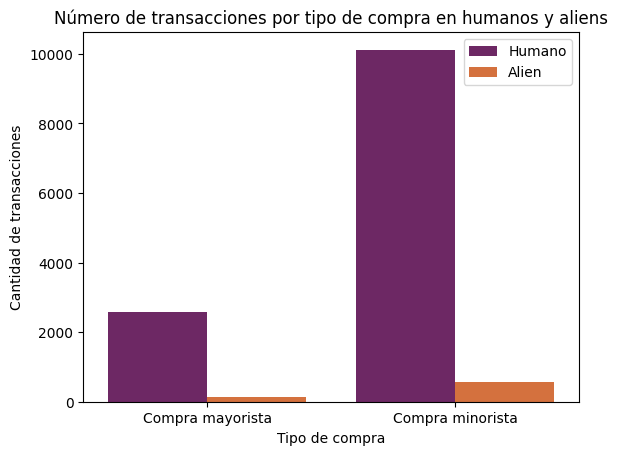

In [ ]:
# 2
sns.countplot(data=df_pandas, x='Type of purchase', hue='Is An Alien', palette='inferno')
plt.title('Número de transacciones por tipo de compra en humanos y aliens')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad de transacciones')
plt.legend(labels=['Humano', 'Alien'])
plt.show()

En este gráfico se puede ver tres aspectos principales: existen muchas más compras realizadas por humanos en comparación con las realizadas por aliens; las compras minoristas son más del triple de frecuentes que las mayoristas; y el comportamiento según el tipo de compra no difiere, ya sea para un humano o un alien.

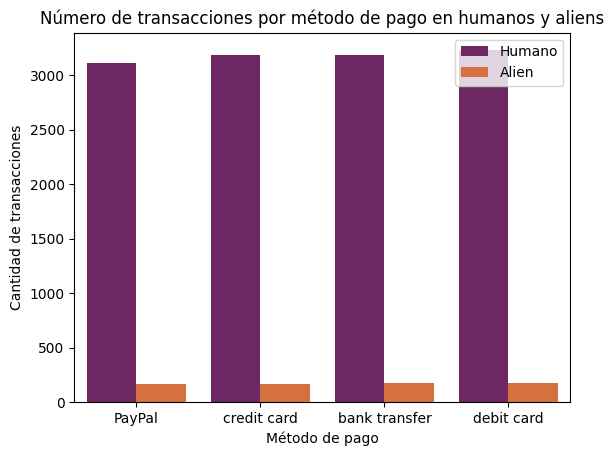

In [ ]:
# 2
sns.countplot(data=df_pandas, x='Payment Method', hue='Is An Alien', palette='inferno')
plt.title("Número de transacciones por método de pago en humanos y aliens")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de transacciones")
plt.legend(labels=['Humano', 'Alien'])
plt.show()

Este gráfico muestra nuevamente como existen muchas más compras realizadas por humanos con respecto a las efectuadas por aliens. Por otro lado, se aprecia como no existen grandes diferencias en el número de transacciones al comparar entre los distintos métodos de pago.

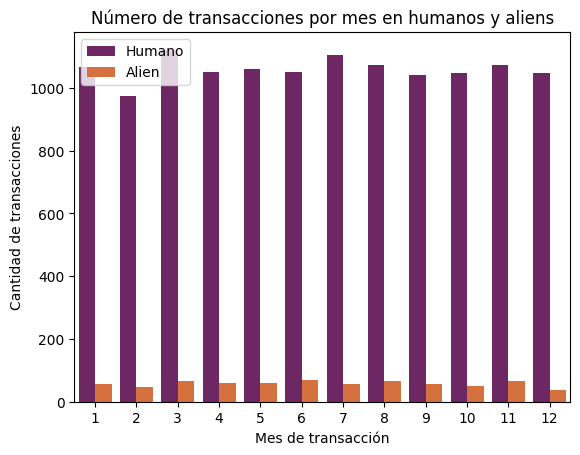

In [ ]:
# 2
sns.countplot(data=df_pandas, x='Transaction Month', hue='Is An Alien', palette='inferno')
plt.title('Número de transacciones por mes en humanos y aliens')
plt.xlabel('Mes de transacción')
plt.ylabel('Cantidad de transacciones')
plt.legend(labels=['Humano', 'Alien'])
plt.show()

En este gráfico se aprecia que no existe una estacionalidad marcada para el número de transacciones que se realizan, ya sea para humanos o para aliens. Se destaca que para humanos los meses de máximo número de transacciones son marzo y julio, mientras que para los aliens es junio y noviembre. Teniendo mayor información del negocio se podría obtener una mejor interpretación de estos peaks.

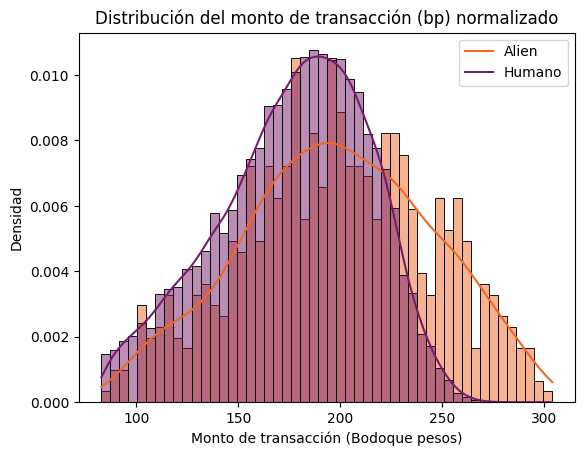

In [ ]:
# 3
sns.histplot(data=df_pandas, x='Transaction bp', hue='Is An Alien', kde=True, stat="density", common_norm=False, palette="inferno")
plt.title('Distribución del monto de transacción (bp) normalizado')
plt.xlabel('Monto de transacción (Bodoque pesos)')
plt.ylabel('Densidad')
plt.legend(labels=['Alien', 'Humano'])
plt.show()

En este gráfico se aprecia como ambas distribuciones son normales (análisis visual). Además, se tiene tanto un menor valor medio de monto de transacción, como una menor varianza, para la distribución del monto de transacción en humanos con respecto al de los aliens. Por último, se menciona la baja estabilidad o poca claridad en la distribución de los datos para aliens, lo que viene a partir del menor número de datos existente.

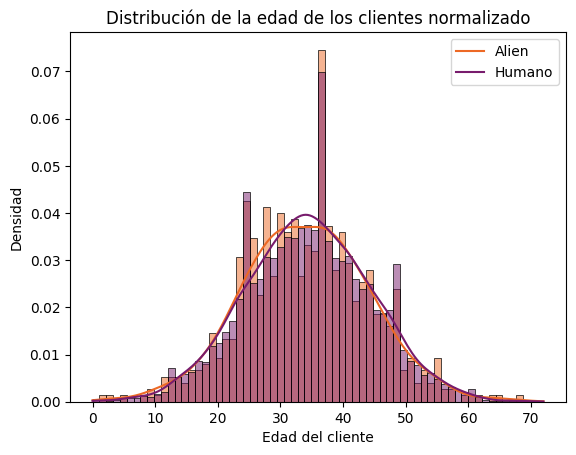

In [ ]:
# 3
sns.histplot(data=df_pandas, x='Customer Age', hue='Is An Alien', kde=True, stat="density", common_norm=False, palette='inferno')
plt.title('Distribución de la edad de los clientes normalizado')
plt.xlabel('Edad del cliente')
plt.ylabel('Densidad')
plt.legend(labels=['Alien', 'Humano'])
plt.show()

En este gráfico se aprecia que tanto humanos como aliens presentan una distribución de edades similar, y que en particular, son normales. Se mencionan ciertos peaks para ambos casos, como serían las edades 25, 37 y 48, aproximadamente.

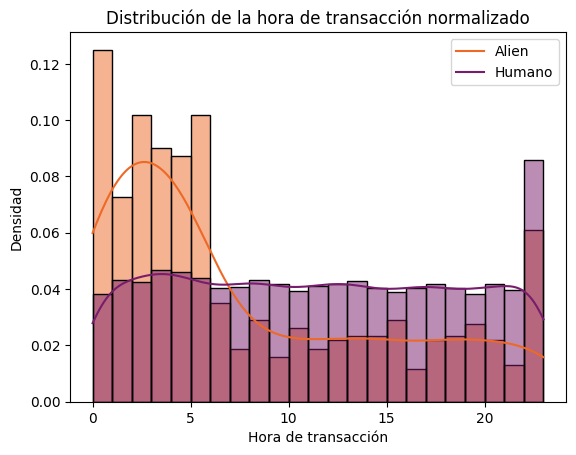

In [ ]:
# 3
sns.histplot(data=df_pandas, x='Transaction Hour', hue='Is An Alien', kde=True, stat="density", common_norm=False, palette="inferno")
plt.title('Distribución de la hora de transacción normalizado')
plt.xlabel('Hora de transacción')
plt.ylabel('Densidad')
plt.legend(labels=['Alien', 'Humano'])
plt.show()

En este gráfico se exhibe una distribución uniforme (con un peak interesante al final del día) con respecto a la hora de transacción para humanos, mientras que para los aliens se tiene una distribución de poisson con peak en las primeras horas de la madrugada.

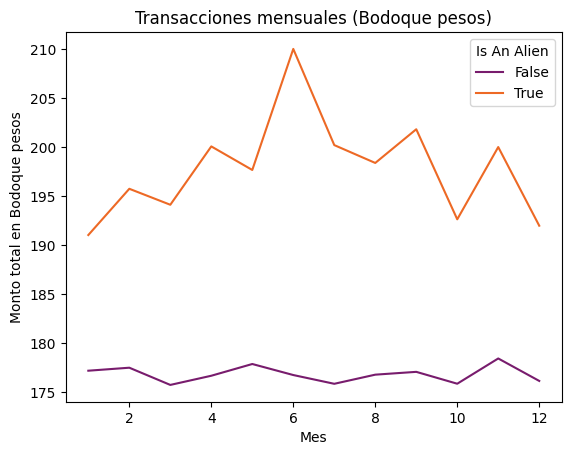

In [ ]:
# 4
sns.lineplot(data=df_pandas, x='Transaction Month', y='Transaction bp', hue='Is An Alien', errorbar=None, palette="inferno")
plt.title('Transacciones mensuales (Bodoque pesos)')
plt.xlabel('Mes')
plt.ylabel('Monto total en Bodoque pesos')
plt.show()

En este gráfico se destaca como, a pesar de que antes se observó que los aliens presentaban un menor número de transacciones en general, estas tienen un mayor monto a lo largo del tiempo si se compara con las respectivas a los humanos. Esto lleva a señalar que un indicador más apropiado sería el ratio de monto de la transacción por el número de transacciones.

Se destaca que para ambos grupos hay un comportamiento similar a lo largo del año para los montos de transacciones, exceptuando para la mitad del año para los aliens, que presentaron un leve aumento en general. Esto habría que complementarlo con el ratio previamente mencionado, para ver si es un efecto del monto o del número de transacciones.

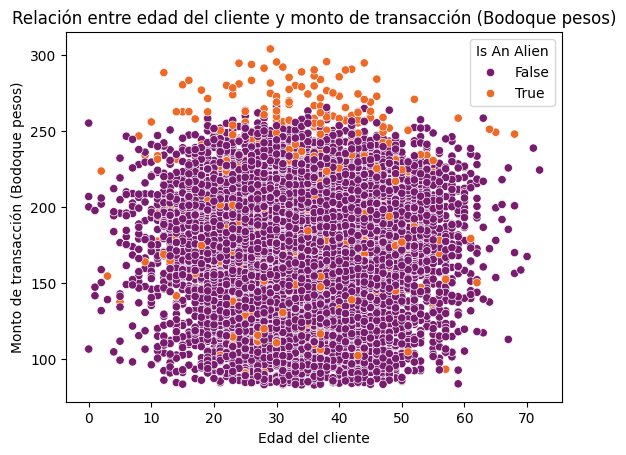

In [ ]:
# 4
sns.scatterplot(data=df_pandas, x='Customer Age', y='Transaction bp', hue='Is An Alien', palette="inferno")
plt.title('Relación entre edad del cliente y monto de transacción (Bodoque pesos)')
plt.xlabel('Edad del cliente')
plt.ylabel('Monto de transacción (Bodoque pesos)')
plt.show()

En este gráfico se destaca un comportamiento homogéneo para humanos en la relación entre edades de clientes y los montos de transacción. Por su parte, para los aliens se percibe nuevamente la tendencia de que las transacciones tienen mayores montos en general, con el agregado de que suelen ser de clientes de entre 20 y 40 años.

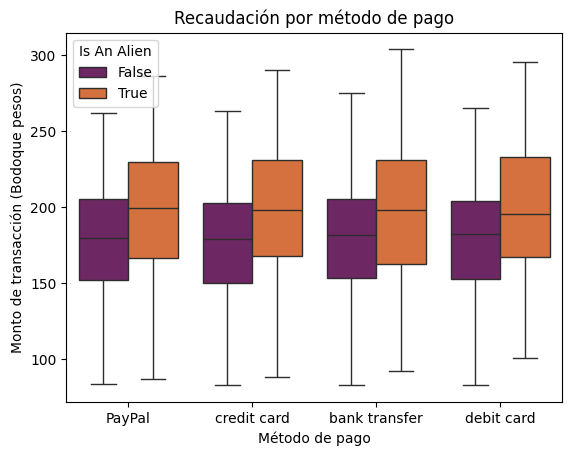

In [ ]:
# 4
sns.boxplot(data=df_pandas, x='Payment Method', y='Transaction bp', hue='Is An Alien', palette="inferno")
plt.title('Recaudación por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Monto de transacción (Bodoque pesos)')
plt.show()

Lo principal que se rescata de este gráfico es que se tiene el mismo comportamiento mencionado antes para la cantidad de transacciones realizadas según método de pago: no existen diferencias notables. Nuevamente se aprecia como los montos son mayores para aliens en general.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [ ]:
# 1

# Tabla temporal
df_parquet.createOrReplaceTempView("transactions")

# Se selecciona "Is An Alien" para la partición, considerando que previamente se ha diferenciado entre humanos y aliens.
# Esto mejorará el redimiento de consultas que filtran por este atributo particular.
df_parquet.write.partitionBy("Is An Alien").mode("overwrite").saveAsTable("transactions_partitioned")

In [ ]:
# 2
query = """
SELECT `Customer ID`, SUM(Quantity) as Total_Products
FROM transactions
GROUP BY `Customer ID`
ORDER BY Total_Products DESC
LIMIT 10
"""

top_clientes = spark.sql(query)
top_clientes.show()

+--------------------+--------------+
|         Customer ID|Total_Products|
+--------------------+--------------+
|6def79d9-fb71-415...|             5|
|abc58f3b-387c-455...|             5|
|2f3d5b31-bd85-4d7...|             5|
|ddfbe502-d51c-4ac...|             5|
|aa8c72f5-fbcc-4bf...|             5|
|ebf10b43-2999-4fa...|             5|
|866e29ec-dd8e-4a1...|             5|
|6300f942-b86d-433...|             5|
|e91ebafd-1925-400...|             5|
|a76f00f5-8493-41b...|             5|
+--------------------+--------------+



### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [ ]:
# 1

from google.colab import drive
drive.mount('/content/gdrive/')

import pickle
ruta_pickle = '/content/gdrive/MyDrive/Laboratorio_4_programación/object.pkl'

with open(ruta_pickle, "rb") as file:
    model = pickle.load(file)

print(type(model))

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# 2

# Métodos y atributos
print(dir(model))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [ ]:
# 2

# Documentación
help(model)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [ ]:
# 3

def predict_fraud(transaction_amount, quantity, customer_age, transaction_hour):
    # Se preparan los datos en el formato esperado por el modelo
    input_data = [[transaction_amount, quantity, customer_age, transaction_hour]]

    # Se predice la probabilidad de fraude
    probabilities = model.predict_proba(input_data)

    # Se retorna la probabilidad de que ocurra fraude
    return float(probabilities[0][-1])

In [ ]:
# 4

from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

fraud_udf = udf(predict_fraud, FloatType())

In [ ]:
# 5

df_parquet1 = df_parquet.withColumn(
    "prediction",
    fraud_udf(
        df_parquet["Transaction Amount"],
        df_parquet["Quantity"],
        df_parquet["Customer Age"],
        df_parquet["Transaction Hour"]
    )
)

# Ejemplo de los resultados
df_parquet1.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+-----------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase| prediction|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+-----

Dentro de los beneficios que entrega utilizar UDF está su base: el procesamiento distribuido. Esto acelera los procesamientos que se aplican sobre conjuntos de datos, agregando así escalabilidad a las aplicaciones que se realizan. Además, permite combinar la potencia que tiene Spark con la simplicidad de los códigos personalizados de Python.